**SANYA GARG**

**20BCE1853**

**SMART BRIDGE EXTERNSHIP - APPLIED DATA SCIENCE**

**ASSIGNMENT 3**



**Problem Statement - House Price Prediction**



1.   Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



2.   Load the dataset





In [2]:
df = pd.read_csv('/content/Housing.csv')



3.  Perform Visualizations

*   Univariate Analysis








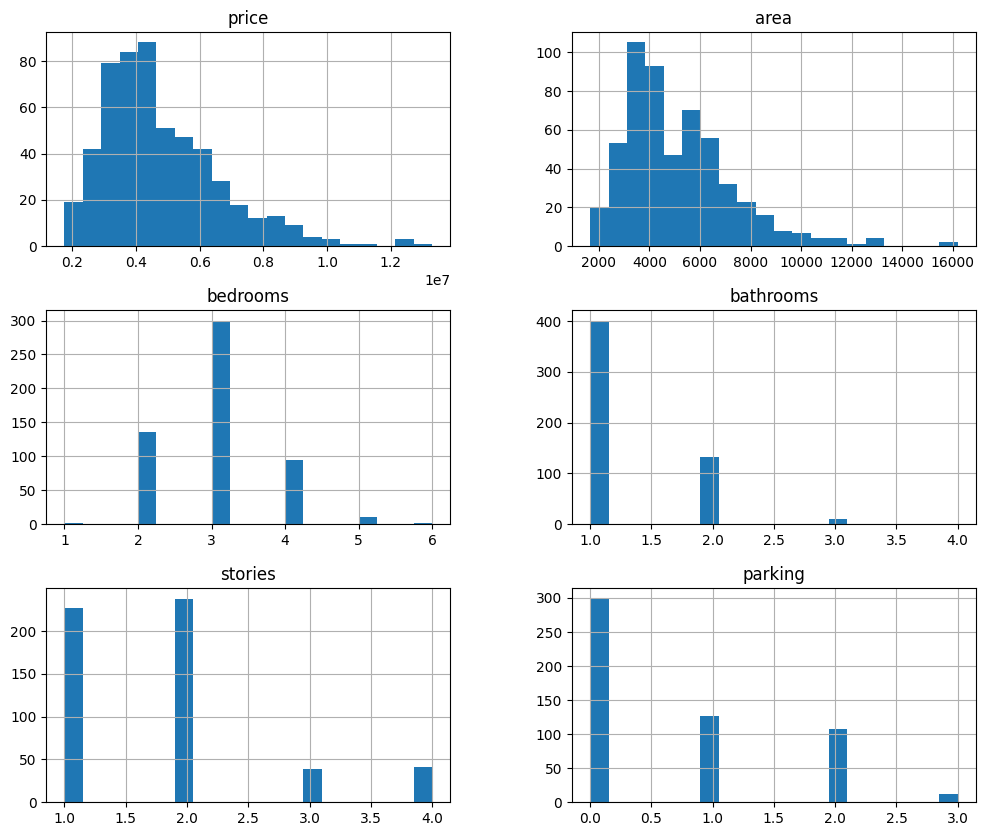

In [3]:
df.hist(bins=20, figsize=(12, 10))
plt.show()




*   Bi-variate Analysis



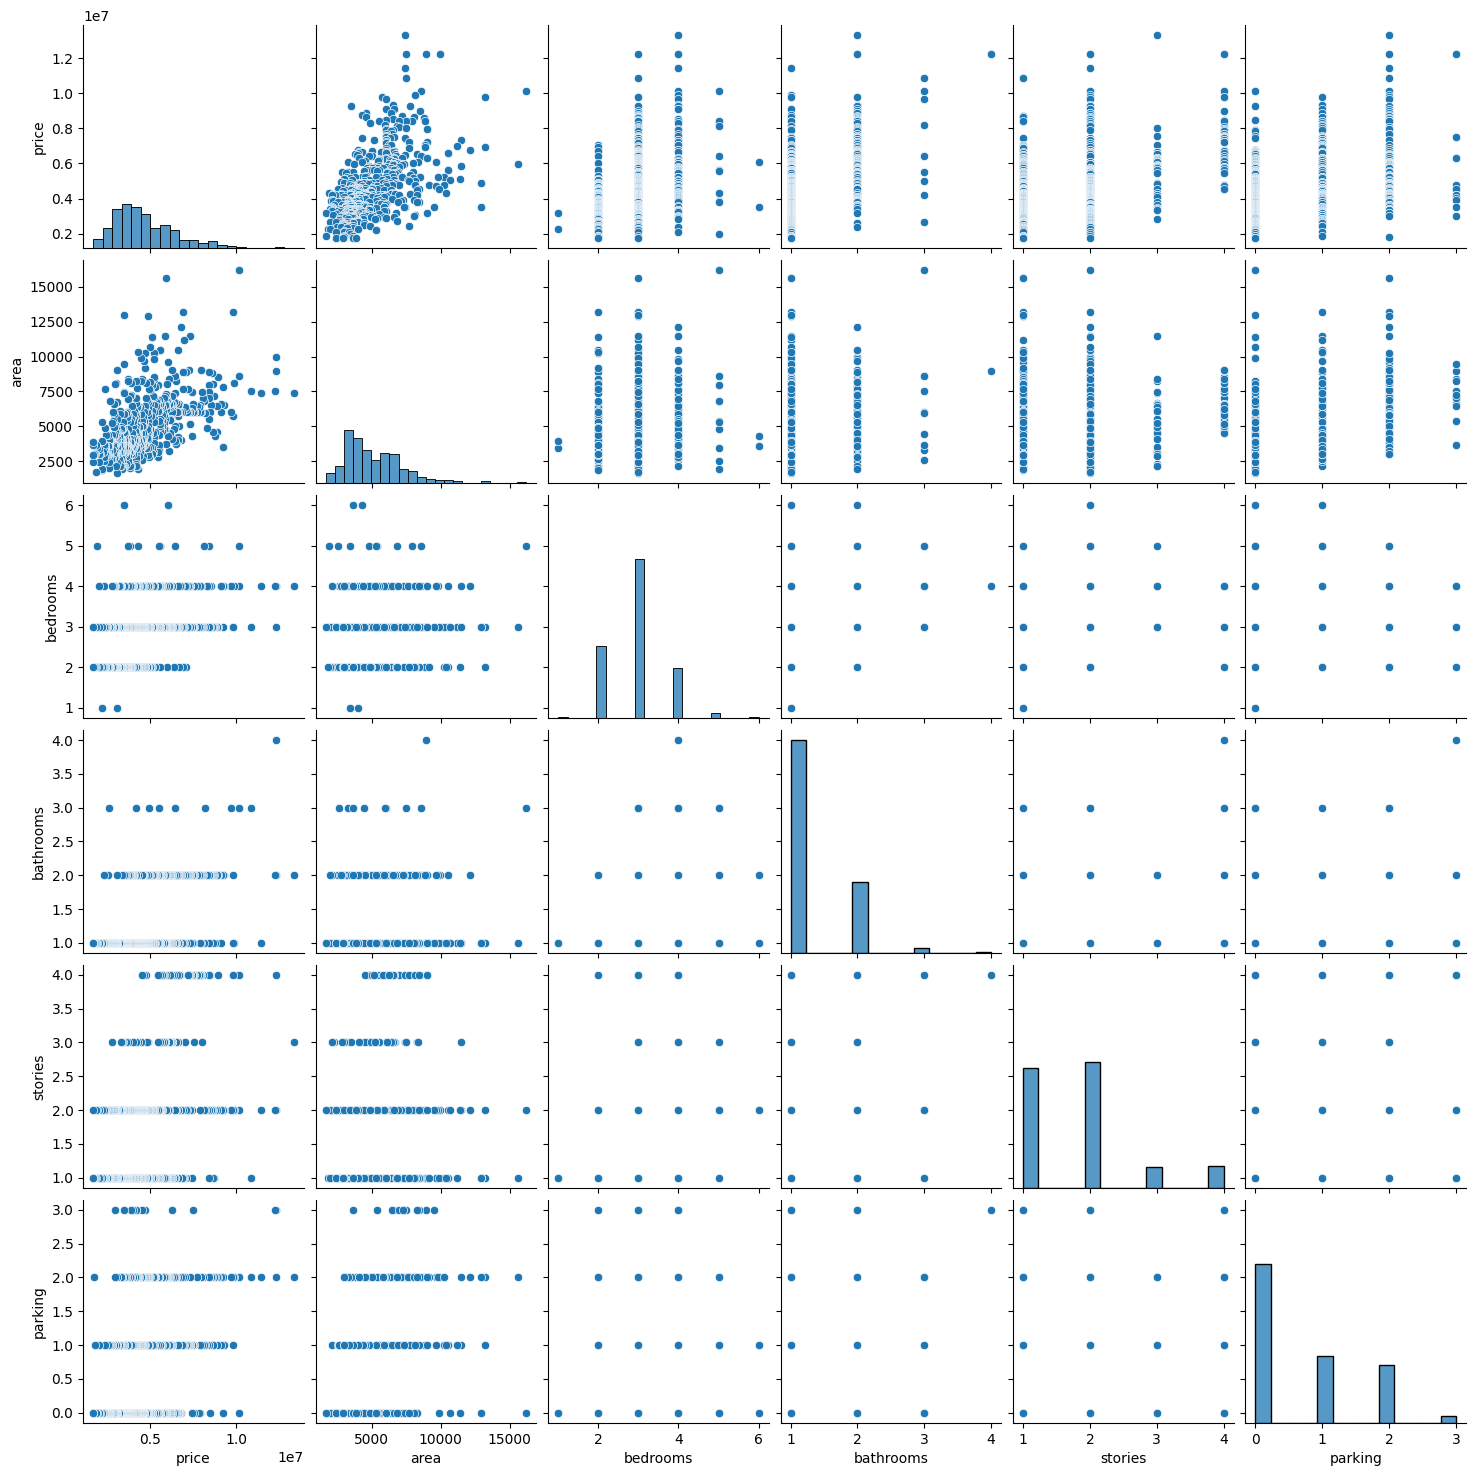

In [4]:
sns.pairplot(df)
plt.show()



*   Multi-Variate Analysis



<ipython-input-5-f6c24c24eff9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')


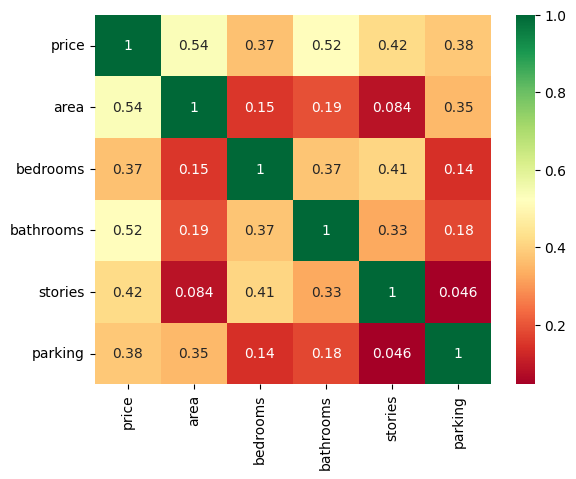

In [5]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()



4.   Descriptive Statistics




In [6]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  




5.   Check for Missing Values and deal with them



In [7]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64




6.   Find and handle outliers



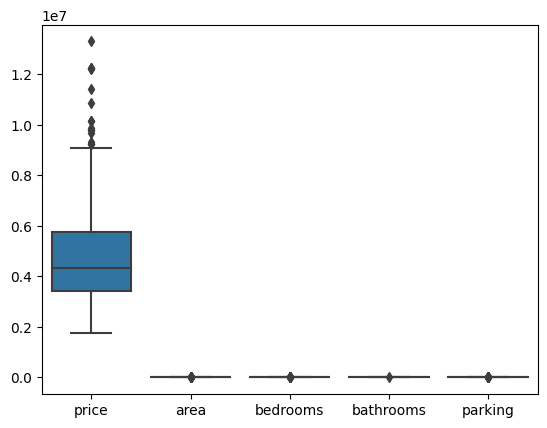

In [8]:
sns.boxplot(data=df[['price', 'area', 'bedrooms', 'bathrooms', 'parking']])
plt.show()



7.   Check for Categorical columns and perform encoding



In [9]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



8.   Split the data into dependent and independent variables



In [10]:
X = df_encoded.drop(['price','basement_yes','furnishingstatus_semi-furnished'], axis=1)
y = df_encoded['price']



9.   Scale the independent variables



In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



10.   Split the data into training and testing



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



11.   Build the Model




In [13]:
model = LinearRegression()



12.   Train the Model



In [14]:
model.fit(X_train, y_train)

LinearRegression()



13.   Test the Model




In [15]:
y_pred = model.predict(X_test)



14.   Measure the performance using Metrics




In [16]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 1853943572907.5676
Mean Absolute Error: 971501.1484273763
R-squared Score: 0.6332144015126182
